<a href="https://www.pieriandata.com"><img src="pierian-data-logo.png"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

2022-03-30 15:38:55.514960: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-30 15:38:55.514986: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

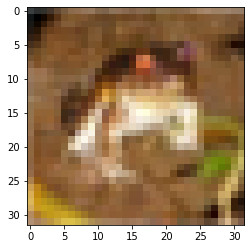

In [5]:
# FROG
plt.imshow(x_train[0])

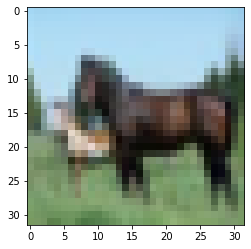

In [6]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
x_train[0].shape

(32, 32, 3)

In [9]:
x_train.max()

255

In [10]:
x_train = x_train / 225

In [11]:
x_test = x_test / 255

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train.shape

(50000, 1)

In [16]:
y_train[0]

array([6], dtype=uint8)

In [17]:
y_cat_train = to_categorical(y_train,10)

In [18]:
y_cat_train.shape

(50000, 10)

In [19]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

2022-03-30 15:42:55.676179: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-30 15:42:55.676210: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-30 15:42:55.676230: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ali): /proc/driver/nvidia/version does not exist
2022-03-30 15:42:55.676447: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [26]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test,y_cat_test), callbacks=[early_stop])

2022-03-30 15:44:07.509635: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/15
   1/1563 [..............................] - ETA: 43:58 - loss: 2.3172 - accuracy: 0.0312

2022-03-30 15:44:09.938194: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23789568 exceeds 10% of free system memory.
2022-03-30 15:44:10.071918: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23789568 exceeds 10% of free system memory.
2022-03-30 15:44:10.084324: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18569280 exceeds 10% of free system memory.
2022-03-30 15:44:10.100700: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23789568 exceeds 10% of free system memory.


1563/1563 [==============================] - 27s 16ms/step - loss: 1.5100 - accuracy: 0.4604 - val_loss: 1.2309 - val_accuracy: 0.5640
Epoch 2/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1654 - accuracy: 0.5918 - val_loss: 1.2390 - val_accuracy: 0.5588
Epoch 3/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0182 - accuracy: 0.6463 - val_loss: 1.0383 - val_accuracy: 0.6362
Epoch 4/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9128 - accuracy: 0.6854 - val_loss: 1.0181 - val_accuracy: 0.6497
Epoch 5/15
1563/1563 [==============================] - 26s 16ms/step - loss: 0.8285 - accuracy: 0.7154 - val_loss: 1.1385 - val_accuracy: 0.6274
Epoch 6/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7661 - accuracy: 0.7370 - val_loss: 0.9666 - val_accuracy: 0.6782
Epoch 7/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7121 - accuracy: 0.7572 - val_loss: 1.2156 - val_accura

In [27]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [28]:
losses = pd.DataFrame(model.history.history)

In [29]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.510032,0.46040,1.230877,0.5640
1,1.165389,0.59176,1.238983,0.5588
2,1.018186,0.64630,1.038267,0.6362
3,0.912823,0.68538,1.018119,0.6497
4,0.828450,0.71540,1.138511,0.6274


<AxesSubplot:>

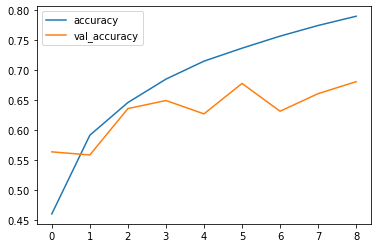

In [30]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

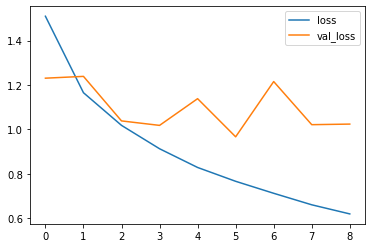

In [31]:
losses[['loss','val_loss']].plot()

In [32]:
model.metrics_names

['loss', 'accuracy']

In [34]:
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose=0))

['loss', 'accuracy']
[1.0239448547363281, 0.6811000108718872]


In [36]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69      1000
           1       0.82      0.83      0.82      1000
           2       0.65      0.53      0.58      1000
           3       0.46      0.56      0.50      1000
           4       0.64      0.69      0.66      1000
           5       0.53      0.58      0.56      1000
           6       0.87      0.65      0.74      1000
           7       0.70      0.76      0.73      1000
           8       0.79      0.77      0.78      1000
           9       0.69      0.85      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [39]:
confusion_matrix(y_test,predictions)

array([[610,  30,  55,  40,  33,  14,   2,  19, 111,  86],
       [ 10, 826,   6,  10,   2,  12,   4,   1,  17, 112],
       [ 50,  12, 530,  96, 102, 102,  29,  54,  11,  14],
       [ 12,  11,  50, 555,  67, 186,  27,  52,  10,  30],
       [ 13,   6,  52,  74, 685,  54,  18,  76,  15,   7],
       [  6,   3,  40, 210,  39, 580,  10,  80,  10,  22],
       [  8,  12,  49, 117,  71,  47, 652,  23,   7,  14],
       [  5,   4,  14,  55,  52,  60,   4, 760,   6,  40],
       [ 41,  47,  16,  37,  13,  13,   4,   5, 767,  57],
       [ 15,  55,   9,  22,   3,  18,   1,   9,  22, 846]])

<AxesSubplot:>

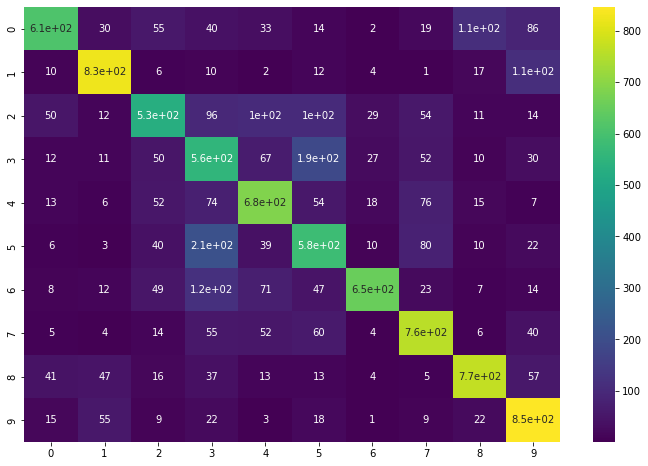

In [52]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap='viridis')
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [53]:
my_image = x_test[16]

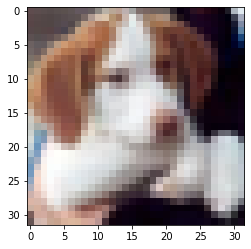

In [54]:
plt.imshow(my_image)

In [56]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=-1)

array([5])

5 is *DOG*

https://www.cs.toronto.edu/~kriz/cifar.html

----